In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import matplotlib.pylab as pl
import os
import sklearn
from  tensorflow.keras.callbacks  import  EarlyStopping , ModelCheckpoint
from  sklearn  import  model_selection , preprocessing
from  tensorflow.keras.models  import  Sequential
from  tensorflow.keras.layers  import  Dense
from  tensorflow.keras.layers  import  Dropout
from  tensorflow.keras.wrappers.scikit_learn  import  KerasRegressor
from  sklearn.model_selection  import  cross_val_score
from  sklearn.model_selection  import  KFold
from  sklearn.preprocessing  import  StandardScaler
from  sklearn.pipeline  import  Pipeline
from sklearn.model_selection import cross_val_predict
from  sklearn.ensemble  import  GradientBoostingRegressor
from  sklearn.model_selection  import  GridSearchCV
import scipy.integrate as integrate
import scipy.optimize as minimiser
from scipy.stats import norm
import numpy.polynomial.polynomial as poly
import Analyzer
import FuncUtil
from Analyzer import Analyzer
import scipy.stats
from scipy.special import erfinv
from scipy.optimize import minimize
import nn_utils
import dt_utils
import my_util

# SET UP

# Importing datasets

where, all datasets:
- Drop the unnamed index column as pandas creates its own index
- Change any infinities for NaN and then drop all NaN
- Comments are specified by #
- Only the top 5 results are shown but I have checked random samples

In [2]:
Diboson = pd.read_csv( "./Diboson.csv", comment="#")
#Diboson.rename(columns={}, inplace=True)
Diboson = Diboson.drop(["Unnamed: 0"], axis=1)
Diboson = Diboson.replace([np.inf, -np.inf], np.nan).dropna()
Diboson.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.387345,41920.540,0,187549.810,374316.600,0.127114,1.786927,353161.47,-0.001591,1.914456,...,1.677279,-1.346853,369495.34,12147.315,1,-0.686657,-2.412152,9755.2705,1014320.10,-1.0
1,0.172328,225618.530,0,13106.807,51429.535,0.269517,2.296220,357617.66,-1.066937,-0.145452,...,-2.057147,2.975854,36972.74,34980.440,-1,-1.521354,2.819377,14584.7360,240295.97,-1.0
2,0.371392,42284.125,0,84519.230,153790.270,0.051175,3.360730,345472.30,0.704825,-2.816466,...,-0.285897,-0.084159,146895.95,24618.990,-1,0.741342,1.177780,19119.7030,471285.40,-1.0
3,0.309902,42735.938,1,76138.640,102611.836,0.117028,0.702838,476446.80,0.095546,1.012053,...,-0.160614,-2.544057,109699.72,22303.861,1,-1.648011,1.120479,8277.4480,495503.10,-1.0
4,0.202772,70475.780,0,86138.000,141886.280,0.053951,3.634348,799487.75,-1.828396,-2.406883,...,-0.499056,0.429884,151453.40,14053.401,-1,-0.171763,2.796952,13848.2230,498823.40,-1.0


In [3]:
ggH1000 = pd.read_csv( "./ggH1000.csv", comment="#")
#ggH1000.rename(columns={}, inplace=True)
ggH1000 = ggH1000.drop(["Unnamed: 0"], axis=1)
ggH1000 = ggH1000.replace([np.inf, -np.inf], np.nan).dropna()
ggH1000.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.013603,44495.770,1,87475.55,627990.80,0.116438,0.889354,675246.25,-0.851387,2.042860,...,-0.906080,-1.876361,320104.62,495510.120,-1,-1.034808,-1.631069,312638.44,1063465.80,999999.56
1,0.242178,34441.156,1,90507.31,409780.94,0.191874,1.485706,604275.70,1.041311,-0.817613,...,2.363212,2.032987,288589.78,579769.560,1,2.178999,2.466579,129548.62,974210.75,1000003.60
2,0.096412,21625.379,0,89765.85,344668.30,0.122089,1.219367,612517.94,0.417858,-2.133300,...,1.217849,0.664946,228625.23,333899.970,-1,1.695172,0.920596,118590.28,996837.40,999999.80
3,0.096373,21855.973,1,92313.63,535629.06,0.061306,0.592705,482630.90,0.438590,2.701475,...,-0.045790,-0.626280,302502.84,243535.750,1,0.293053,-0.557273,233439.89,989655.56,1000008.80
4,0.073052,33677.380,1,89451.92,296257.47,0.159334,0.724910,459737.80,1.213717,-0.926707,...,-1.289961,2.238501,224785.02,98477.516,-1,-0.747040,2.647597,76205.98,993398.30,1000011.90


In [4]:
Top = pd.read_csv( "./Top.csv", comment="#")
#Top.rename(columns={}, inplace=True)
Top = Top.drop(["Unnamed: 0"], axis=1)
Top = Top.replace([np.inf, -np.inf], np.nan).dropna()
Top.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,2.004522e-09,51609.760,1,35253.492,35612.324,0.109581,1.435712,461309.30,-1.195378,2.909157,...,0.164823,1.042926,38513.980,11072.072,1,-0.665443,-0.969063,9003.888,245723.92,-1.0
1,1.822626e-09,225038.800,1,20311.205,38644.793,0.090346,2.403266,276659.70,0.387434,3.050592,...,-1.871251,0.601309,34191.734,34626.312,1,-1.975266,1.798074,9425.637,351938.88,-1.0
2,1.552981e-09,27090.697,1,134715.500,244261.840,0.212569,1.336584,900965.50,-1.822714,-0.619062,...,0.701193,2.446600,254871.310,17551.730,-1,-0.196344,0.185058,17218.764,1046120.90,-1.0
3,1.660535e-09,57572.890,0,69086.836,90045.625,0.133918,1.780693,596016.20,-1.725750,-2.554189,...,-2.305750,0.627527,84608.050,10652.912,1,-0.413642,1.657720,9801.820,301995.70,-1.0
4,1.461494e-09,123177.900,0,51731.508,52780.684,0.101556,3.398984,590811.44,1.477704,1.432744,...,-0.685020,-2.360906,50720.953,15453.791,-1,0.880629,2.436030,10932.975,376986.28,-1.0


In [5]:
Zjets = pd.read_csv( "./Zjets.csv", comment="#")
#Zjets.rename(columns={}, inplace=True)
Zjets = Zjets.drop(["Unnamed: 0"], axis=1)
Zjets = Zjets.replace([np.inf, -np.inf], np.nan).dropna()
Zjets.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,-0.790471,177227.420,1,95697.766,64252.690,0.097862,1.895164,425871.88,-1.329446,-0.485957,...,1.782276,-1.057460,76128.370,12476.566,1,-0.289019,1.966965,11973.011,596020.44,-1.0
1,0.789204,10660.757,1,90289.914,32506.705,0.000000,0.000000,247948.36,-0.429050,2.770810,...,-0.918399,-1.229385,40799.945,38147.754,1,0.847265,0.995251,27624.867,260357.19,-1.0
2,-0.872639,655334.400,1,92994.430,55287.625,0.059006,2.463149,630492.94,-0.543789,-2.190247,...,-1.091297,0.865696,57988.660,29768.775,1,0.440004,-1.042492,27102.590,422698.44,-1.0
3,-0.772697,41489.973,1,89607.580,63405.484,0.265080,2.081222,610611.56,1.776149,-0.214862,...,1.238367,2.127853,55424.742,69817.470,1,0.809497,-2.276664,51873.030,302718.06,-1.0
4,1.581337,41731.630,1,90199.480,47187.332,0.093765,2.321676,781746.90,-1.524169,-1.101946,...,-0.116431,1.745413,68312.220,33509.810,1,0.598434,-1.972788,28290.979,461896.25,-1.0


This plots the distributions of the variables (as defined in subset) for each dataset on the same plot. They are slightly translucent to allow all distributions to be seen through each other to see trends. This allows me to continue to the next part, to place kinematic cuts on the data.

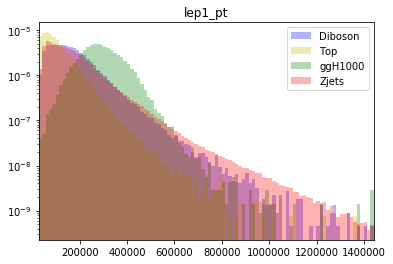

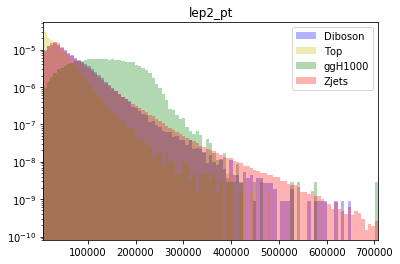

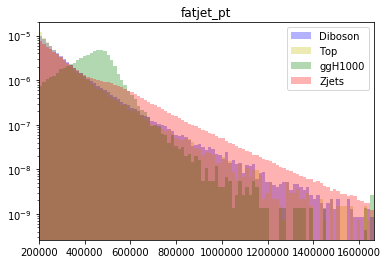

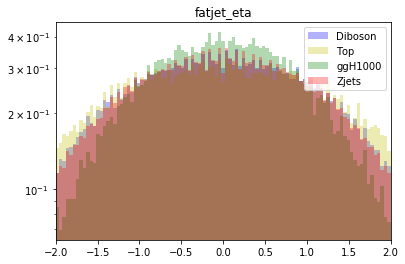

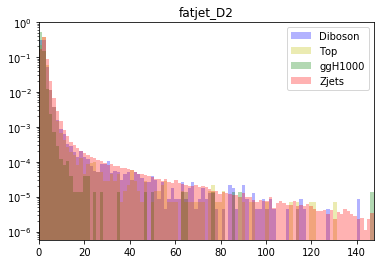

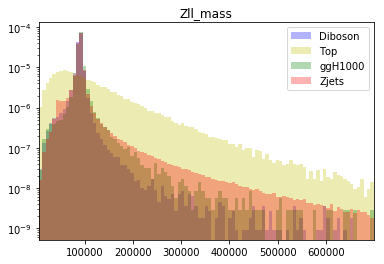

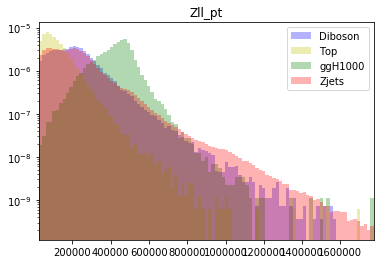

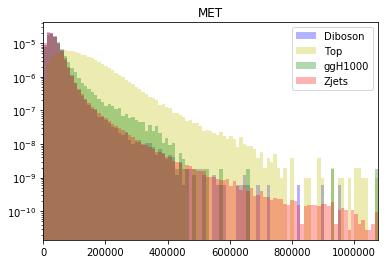

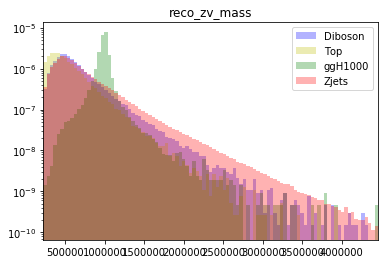

In [6]:
subset=["lep1_pt","lep2_pt","fatjet_pt","fatjet_eta","fatjet_D2","Zll_mass","Zll_pt","MET","reco_zv_mass"]


for index in subset:
    plt.subplot(1,1,1)
    bins = np.linspace((min(ggH1000[index])),(max(ggH1000[index])),100, endpoint=True)
    plt.hist(Diboson[index],color="b",density=True, alpha=0.3, label='Diboson',bins=bins)
    plt.hist(Top[index],color="y",density=True, alpha=0.3, label='Top',bins=bins)
    plt.hist(ggH1000[index],color="g",density=True, alpha=0.3, label='ggH1000',bins=bins)
    plt.hist(Zjets[index],color="r",density=True, alpha=0.3, label='Zjets',bins=bins)
    plt.xlim((min(ggH1000[index]),(max(ggH1000[index]))))
    plt.yscale("log")
    plt.title(index)
    plt.legend(loc='upper right')
    plt.show()

Now kinematic cuts are made based on the histogram plots above. I didn't cut below the signal, as it made the signal harder to see when plotting the cut data histograms. However, I didn't go as far as to check within the range 800000-1400000 with cuts on both sides applied so it is possible it would have been fine. I cut all the variables apart from 'reco_zv_mass' and 'isSignal' (the target features). I set new dataframes from the original to make the cuts so I didn't ruin my original data, else I would have to import from the file again.

In [7]:
subsetofinterest=["lep1_pt","lep2_pt","fatjet_pt","fatjet_eta","fatjet_D2","Zll_mass","Zll_pt","MET"]
subsettotal=["lep1_pt","lep2_pt","fatjet_pt","fatjet_eta","fatjet_D2","Zll_mass","Zll_pt","MET","reco_zv_mass","isSignal","FullEventWeight"]

precutDiboson=Diboson[subsettotal]
precutTop=Top[subsettotal]
precutggH1000=ggH1000[subsettotal]
precutZjets=Zjets[subsettotal]

cutDiboson = precutDiboson
cutDiboson = cutDiboson[cutDiboson["lep1_pt"] < 600000]
cutDiboson = cutDiboson[cutDiboson["lep2_pt"] < 300000]
cutDiboson = cutDiboson[cutDiboson['fatjet_pt'] < 600000]
cutDiboson = cutDiboson[(cutDiboson['fatjet_eta'] < 1.0) & (cutDiboson['fatjet_eta'] > -1.0)]
cutDiboson = cutDiboson[cutDiboson['fatjet_D2'] < 10]
cutDiboson = cutDiboson[cutDiboson['Zll_mass'] < 150000]
cutDiboson = cutDiboson[cutDiboson['Zll_pt'] < 800000]
cutDiboson = cutDiboson[cutDiboson['MET'] < 400000]

cutTop = precutTop
cutTop = cutTop[cutTop['lep1_pt'] < 600000]
cutTop = cutTop[cutTop['lep2_pt'] < 300000]
cutTop = cutTop[cutTop['fatjet_pt'] < 600000]
cutTop = cutTop[(cutTop['fatjet_eta'] < 1.0) & (cutTop['fatjet_eta'] > -1.0)]
cutTop = cutTop[cutTop['fatjet_D2'] < 10]
cutTop = cutTop[cutTop['Zll_mass'] < 150000]
cutTop = cutTop[cutTop['Zll_pt'] < 800000]
cutTop = cutTop[cutTop['MET'] < 400000]

cutggH1000 = precutggH1000
cutggH1000 = cutggH1000[cutggH1000['lep1_pt'] < 600000]
cutggH1000 = cutggH1000[cutggH1000['lep2_pt'] < 300000]
cutggH1000 = cutggH1000[cutggH1000['fatjet_pt'] < 600000]
cutggH1000 = cutggH1000[(cutggH1000['fatjet_eta'] < 1.0) & (cutggH1000['fatjet_eta'] > -1.0)]
cutggH1000 = cutggH1000[cutggH1000['fatjet_D2'] < 10] 
cutggH1000 = cutggH1000[cutggH1000['Zll_mass'] < 150000] 
cutggH1000 = cutggH1000[cutggH1000['Zll_pt'] < 800000] 
cutggH1000 = cutggH1000[cutggH1000['MET'] < 400000]

cutZjets = precutZjets
cutZjets = cutZjets[cutZjets['lep1_pt'] < 600000]
cutZjets = cutZjets[cutZjets['lep2_pt'] < 300000]
cutZjets = cutZjets[cutZjets['fatjet_pt'] < 600000]
cutZjets = cutZjets[(cutZjets['fatjet_eta'] < 1.0) & (cutZjets['fatjet_eta'] > -1.0)]
cutZjets = cutZjets[cutZjets['fatjet_D2'] < 10]
cutZjets = cutZjets[cutZjets['Zll_mass'] < 150000]
cutZjets = cutZjets[cutZjets['Zll_pt'] < 800000]
cutZjets = cutZjets[cutZjets['MET'] < 400000]

Same as before, just plotting the features for each dataset against each other for the *CUT* dataset, I left the axis the same to make the cuts more obvious inspection when comparing to the previous graphs.

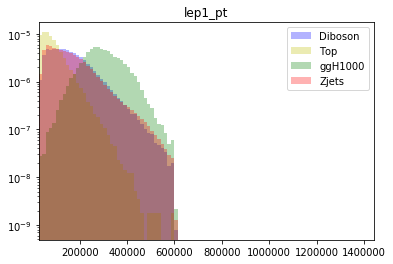

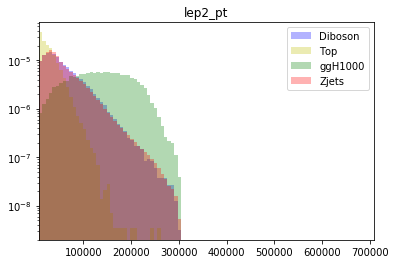

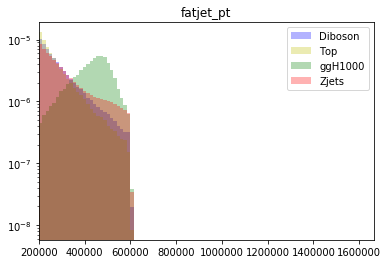

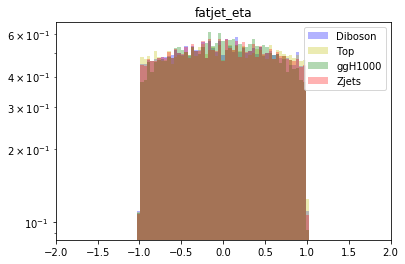

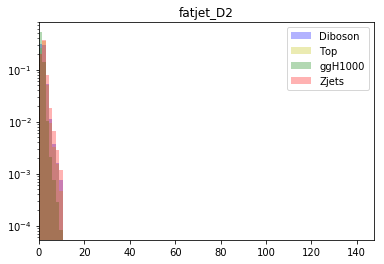

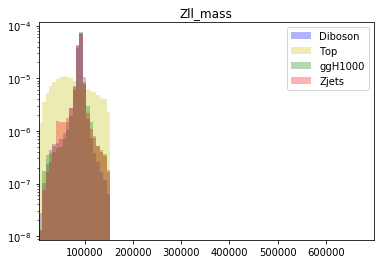

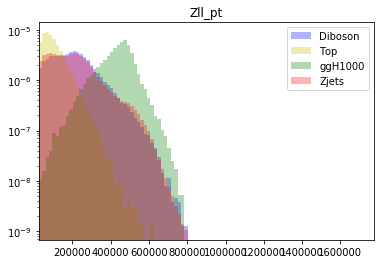

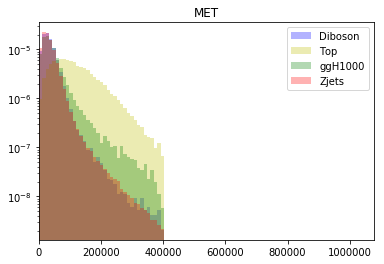

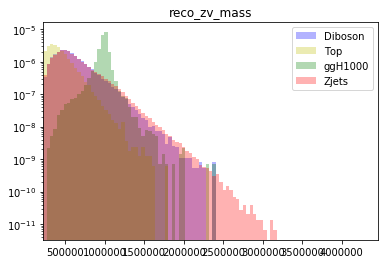

In [8]:
subset=["lep1_pt","lep2_pt","fatjet_pt","fatjet_eta","fatjet_D2","Zll_mass","Zll_pt","MET","reco_zv_mass"]


for index in subset:
    plt.subplot(1,1,1)
    bins = np.linspace((min(ggH1000[index])),(max(ggH1000[index])),100, endpoint=True)
    plt.hist(cutDiboson[index],color="b",density=True, alpha=0.3, label='Diboson',bins=bins)
    plt.hist(cutTop[index],color="y",density=True, alpha=0.3, label='Top',bins=bins)
    plt.hist(cutggH1000[index],color="g",density=True, alpha=0.3, label='ggH1000',bins=bins)
    plt.hist(cutZjets[index],color="r",density=True, alpha=0.3, label='Zjets',bins=bins)
    plt.xlim((min(ggH1000[index]),(max(ggH1000[index]))))
    plt.yscale("log")
    plt.title(index)
    plt.legend(loc='upper right')
    plt.show()

# BEFORE CUTS

I tried to use $frac=0.5$ in the sample technique below but the signal was still below the background, the best (largest value whilst not reducing background to a point where the overall trend was ruined) value for the sample fraction was 0.01, or 1% of the data we had on the background. This was made more difficult by the fact that I used normalised datasets in the previous plots.

In [9]:
scaledDiboson = Diboson.sample(frac=0.01)
scaledTop = Top.sample(frac=0.01)
scaledZjets = Zjets.sample(frac=0.01)

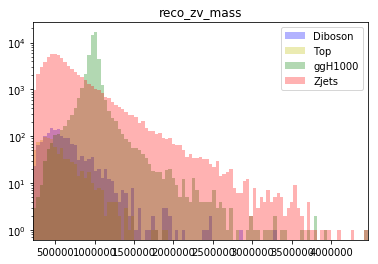

In [10]:
integrated_subset=["reco_zv_mass"]

for index in integrated_subset:
    plt.subplot(1,1,1)
    bins = np.linspace((min(ggH1000[index])),(max(ggH1000[index])),100, endpoint=True)
    plt.hist(scaledDiboson[index],color="b", alpha=0.3, label='Diboson',bins=bins)
    plt.hist(scaledTop[index],color="y", alpha=0.3, label='Top',bins=bins)
    plt.hist(ggH1000[index],color="g", alpha=0.3, label='ggH1000',bins=bins)
    plt.hist(scaledZjets[index],color="r", alpha=0.3, label='Zjets',bins=bins)
    plt.xlim((min(ggH1000[index]),(max(ggH1000[index]))))
    plt.yscale("log")
    plt.title(index)
    plt.legend(loc='upper right')
    plt.show()

In [11]:
hist1, bin_edges1 = np.histogram(scaledDiboson["reco_zv_mass"], weights=scaledDiboson["FullEventWeight"])
hist2, bin_edges2 = np.histogram(scaledTop["reco_zv_mass"], weights=scaledTop["FullEventWeight"])
hist3, bin_edges3 = np.histogram(ggH1000["reco_zv_mass"], weights=ggH1000["FullEventWeight"])
hist4, bin_edges4 = np.histogram(scaledZjets["reco_zv_mass"], weights=scaledZjets["FullEventWeight"])

events = np.sum(hist1) + np.sum(hist2) + np.sum(hist3) + np.sum(hist4)
events

57826.77507161611

# AFTER CUTS

As before the cuts, the same frac had to be used in order to be able to compare the results. After the cuts, the x-axis is obviously more compacted, but interestingly, the trend is now much more difficult to discern for the seperate backgrounds, probably due to the random sampling from a much lower number of entries and hence much lower number of events.

In [12]:
scaledcutDiboson = cutDiboson.sample(frac=0.01)
scaledcutTop = cutTop.sample(frac=0.01)
scaledcutZjets = cutZjets.sample(frac=0.01)

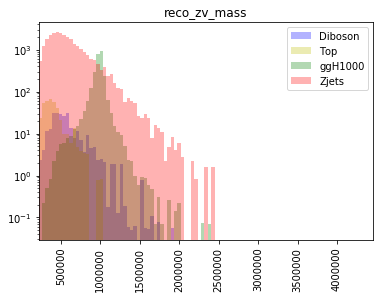

In [13]:
for index in integrated_subset:
    plt.subplot(1,1,1)
    bins = np.linspace((min(ggH1000[index])),(max(ggH1000[index])),100, endpoint=True)
    plt.hist(scaledcutDiboson[index],color="b", alpha=0.3, label='Diboson',bins=bins, weights=scaledcutDiboson["FullEventWeight"])
    plt.hist(scaledcutTop[index],color="y", alpha=0.3, label='Top',bins=bins, weights=scaledcutTop["FullEventWeight"])
    plt.hist(cutggH1000[index],color="g", alpha=0.3, label='ggH1000',bins=bins, weights=cutggH1000["FullEventWeight"])
    plt.hist(scaledcutZjets[index],color="r", alpha=0.3, label='Zjets',bins=bins, weights=scaledcutZjets["FullEventWeight"])
    plt.xlim((min(ggH1000[index]),(max(ggH1000[index]))))
    plt.yscale("log")
    plt.title(index)
    plt.xticks(rotation='vertical')
    plt.legend(loc='upper right')
    plt.show()

In [14]:
hist1, bin_edges1 = np.histogram(scaledcutDiboson[index], weights=scaledcutDiboson["FullEventWeight"])
hist2, bin_edges2 = np.histogram(scaledcutTop[index], weights=scaledcutTop["FullEventWeight"])
hist3, bin_edges3 = np.histogram(cutggH1000[index], weights=cutggH1000["FullEventWeight"])
hist4, bin_edges4 = np.histogram(scaledcutZjets[index], weights=scaledcutZjets["FullEventWeight"])

cutevents = np.sum(hist1) + np.sum(hist2) + np.sum(hist3) + np.sum(hist4)
cutevents

31561.517183550037

This value below shows the difference between the number of events (so the entry from the dataframe using its full event weight), the difference between the number of events before kinematic cuts and after seems to be staggering, although this is due to the scaling of the background in order to see a signal. 

In [15]:
events - cutevents

26265.257888066073

This was an even more interesting indicator of how much the kinematic cuts took out, kinematic cuts meant that the background signal total was very close the signal total considering the amount of data we started with, still a very small fraction to use for data analysis (depending again on the total number of events and how much we wish to dedicate to training/testing a NN on)

In [16]:
cutevents/events

0.5457941782930551

# fitting and hypothesis testing

I concatenated the scaled and cut background dataframes into one dataframe for fitting and hypothesis testing. I tried to used non-scaled (just cut) but the histogram massively overwhelmed the signal data by about 20x.

In [17]:
mega = pd.concat([scaledcutDiboson,scaledcutTop,scaledcutZjets],ignore_index=True)
sklearn.utils.shuffle(mega, random_state=24)
mega.reset_index(drop=True)
mega.head()

if (len(mega.index) == len(scaledcutDiboson.index) + len(scaledcutZjets.index) + len(scaledcutTop.index)):
    print ("YES")

YES


Helper functions were taken from learn solutions:

- NegativeLLcalculator: negative log liklihood calculator, when training a model, we want to find the minima of a loss function given a set of parameters (in a neural network, for example).

- findMax: finds the max value of a PDF given some variables

- plotShape/mapShape: plot the PDF

- printOptimizeResult: print out the optimised values for the variables

## HELPER FUNCTIONS

In [18]:
# To calculate NLL for optimize
class NegativeLLcalculator:
    
    def __init__( self, pdf, data ):
        self.pdf = pdf
        self.data = data
 
    # To calcualte an NLL frm a dataset and a pdf
    # This format is suitable for use by optimize
    def evaluate( self, params ):
        nll = 0.
        self.pdf.setParameters(params)
        #print params
        for i in range(len(self.data)):
            prob = self.pdf.evaluate(self.data[i])
            if prob <=0 : prob = 0.00000001
            logprob = math.log(prob)
            nll+= logprob
        return -nll

In [20]:
# To find the maximum value of a function
def findMax( func, lolimit, hilimit ):
    max = 0
    grid= 100000
    dt = (hilimit-lolimit)/float(grid)
    for i in range(grid):
        if( func(lolimit+i*dt) > max ): 
            max = func(lolimit+i*dt)
    return max

In [21]:
# function to plot a pdf and matching histogram data
def plotShape( data, pdf, lolimit, hilimit, nbins ):
    x,y = mapShape( pdf, lolimit, hilimit, nbins )
    scaleFactor = len(data)/np.sum(y)
    y = np.multiply( y, scaleFactor )
    plt.plot(x,y)
    plt.hist(data, bins=nbins, range=[lolimit,hilimit])
    plt.show()

In [22]:
# function to make x,y map of a shape function
def mapShape( shape, lolimit, hilimit, steps ):
    y = []
    x = []
    increment = (hilimit-lolimit)/float(steps)
    for i in range( steps ):
        t = lolimit+i*increment
        x.append(t)
        y.append(shape.evaluate(t))
    return x,y

In [23]:
def printOptimizeResult( result ):
    values =  result.x
    print("\nFit parameter results are:")
    for i in range(len(values)):
        print(" p"+str(i)+" = "+str(values[i]) )

## SIGNAL FITTING

I used a similar code to some of the checkpoints to miminmise the Gaussian dist (signal). It works, however it takes me running the same block ~4x to get the gaussian to not be wide and flat. It is weird and I cannot figure out why, I don't expect you to run the block 4 times either as it takes a while, but the values it gave me back were always mu~995000 and sigma~47000.

In [24]:
def Fit( ):
    
    print("=======================================")
    print("Doing: gaussian fit")

    lolimit = 800000.
    hilimit = 1400000.
    mu = 995000
    sigma = 47000
    
    #Create the pdf
    paramsin = [mu, sigma]
    pdf = gaussian( lolimit, hilimit, paramsin )
    
    #get the data
    data = ggH1000["reco_zv_mass"]
    plotShape( data, pdf, lolimit, hilimit, 80 )
    
    #Create an NLL calculator
    nllcalc = NegativeLLcalculator( pdf, data )

    #Fit for best parameters
    result1 = minimiser.minimize(nllcalc.evaluate, paramsin, method="L-BFGS-B" )
  
    #print result1
    finalParams = result1.x
    printOptimizeResult(result1)
    
    pdf.setParameters( finalParams )
    plotShape( data, pdf, lolimit, hilimit, 80 )

In [25]:
class gaussian:
    
    # Constructor
    def __init__(self, lolim, hilim, params):
        self.lolimit = lolim
        self.hilimit = hilim
        self.setParameters( params )
        self.max = findMax( self.evaluate, self.lolimit, self.hilimit )
    
    # Set parameters
    def setParameters(self, params ):
        self.mu = params[0]
        self.sigma = params[1]
    
    # Evaluate method (un-normalised)
    def evaluate( self, x ):
        part1 = (1/self.sigma*np.sqrt(2*np.pi))*np.exp(-np.power(x - self.mu, 2.) / (2 * np.power(self.sigma, 2.)))
        return part1

Doing: gaussian fit


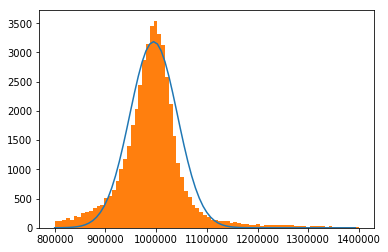


Fit parameter results are:
 p0 = 994999.7084856343
 p1 = 47011.952088994105


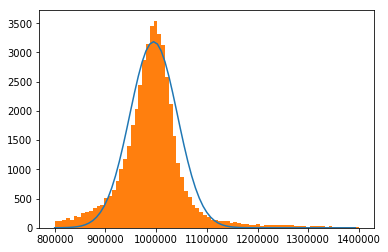

In [26]:
Fit()

## background fit

Here I fit to the scaled, cut background. The line looks odd but only because it's fitting to the area I specified (in the range 800000,1400000). Once combined with the signal fit further down, it looks much more in line with what I expected.

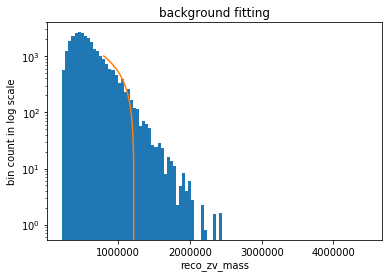

In [27]:
n, bins, patches = plt.hist(mega['reco_zv_mass'], weights=mega['FullEventWeight'], bins=bins, label='background')
x = np.linspace(800000, 1400000, 99)
params = poly.polyfit(x, n, 1)
polynomial = poly.polyval(x, params)
plt.yscale('log')
plt.xlabel('reco_zv_mass')
plt.ylabel('bin count in log scale')
plt.title('background fitting')
plt.plot(x, polynomial)

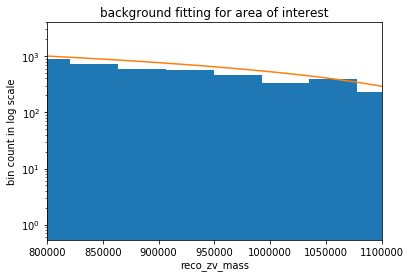

In [28]:
n, bins, patches = plt.hist(mega['reco_zv_mass'], weights=mega['FullEventWeight'], bins=bins, label='background')
x = np.linspace(800000, 1400000, 99)
params = poly.polyfit(x, n, 1)
polynomial = poly.polyval(x, params)
plt.yscale('log')
plt.xlabel('reco_zv_mass')
plt.ylabel('bin count in log scale')
plt.title('background fitting for area of interest')
plt.xlim(800000,1100000)
plt.plot(x, polynomial)

Below I combined the datasets just to see if the signal was still visible above the background.

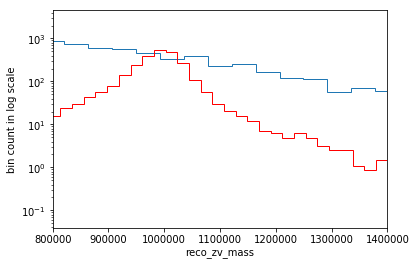

In [29]:
plt.hist(mega['reco_zv_mass'], weights=mega['FullEventWeight'], bins=bins, label='background', histtype='step')
plt.hist(cutggH1000['reco_zv_mass'],weights=cutggH1000['FullEventWeight'],histtype='step', color='r', bins =100)
plt.yscale('log')
plt.xlabel('reco_zv_mass')
plt.ylabel('bin count in log scale')
plt.xlim(800000,1400000)
plt.show()

## combining

I attempted to use my long PDF from the gaussian section, however it threw an error when trying to combine with the line fit to plot a graph. So I switched the hand written equation for the gaussian with np.random.normal (which technically should give exactly the same thing, I think the fact I had a free variable x in my hand written equation was causing the issue) to draw values. I used the values from my fit so the formula should theoretically look identical when plotted. This section below takes a fraction, takes a random number, relative to the fraction the loop then takes either a background or signal value from the fits calculated above. Then calling the function and plotting the subsequent data gives the graph below.

In [30]:
frac=len(cutggH1000)/(len(scaledcutTop+scaledcutZjets+scaledcutDiboson)+len(cutggH1000))
mass = []
slp=params[1]
intcpt=params[0]
tot_events=len(ggH1000['reco_zv_mass'])+len(mega['reco_zv_mass'])
mean=995000
std=47000
def comb_graph():
    for i in range(0, tot_events):
        rnd=np.random.uniform()
        if(rnd<frac):
            sig_x =  np.random.normal(mean, std)
            mass.append(sig_x)
        else:
            doLoop=True
            while(doLoop==True):
                bgd_x=np.random.uniform(700000, 1500000)
                y1=intcpt + slp * bgd_x
                y2=np.random.uniform(0,n[0])
                if(y2<y1):
                    mass.append(bgd_x)
                    doLoop=False

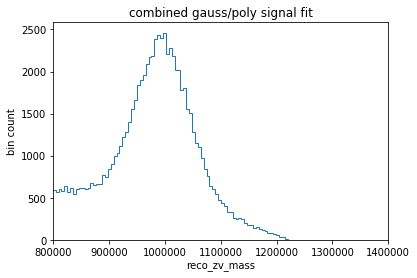

In [31]:
comb_graph()
plt.hist(mass, bins=100, histtype='step')
plt.title('combined gauss/poly signal fit')
plt.xlabel('reco_zv_mass')
plt.ylabel('bin count')
plt.xlim(800000, 1400000)
plt.show()

The graph above shows an obvious bump, which is the signal. I changed the histtype to step to make the bump more visible, I found this histtype easier to see the trend. Next I use Wilks theorem to calculate the statistical significance of the bump.

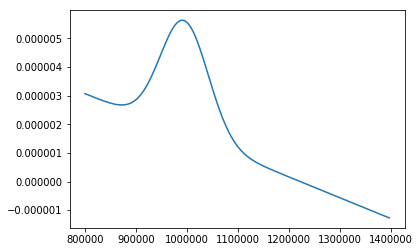

Fit converged =  True
Solution:  [ 2.90257505e+03 -1.96308867e-03  6.90720000e+04  4.05824002e-01]
Fit converged =  True
Solution:  [ 2.90257505e+03 -1.96672318e-03  6.90720000e+04  0.00000000e+00]
chi2_H1 =  10455.800961573757 chi2_H0 =  28577.59503054829 DChi2 =  18121.794068974534
p-value =  0.0  or a inf sigma effect
significance-value of : 0.3855700865739263


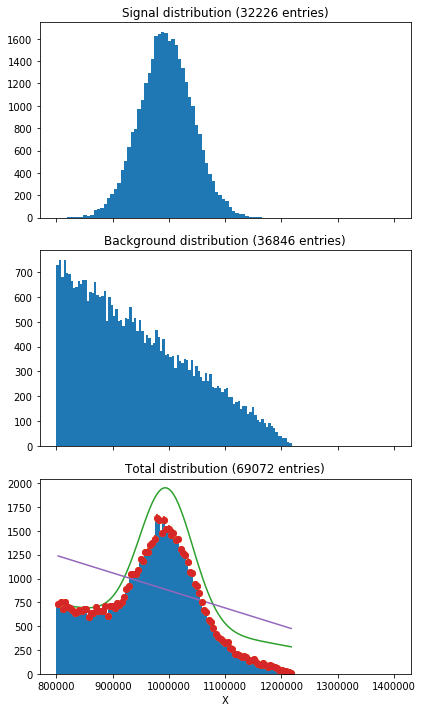

In [32]:
np.random.seed(24)

# background parameters
XMIN = 800000.
XMAX = 1400000.
intercept = params[0]
slope = params[1]
# signal parameters
mean = 995000
sigma = 47000
# chose number of bins that is appropriate for the size of the statistics sample
NBINS = 100

a = Analyzer(XMIN, XMAX, NBINS)
a.setBackground(intercept, slope)
a.setSignal(mean, sigma)
Nsig = len(cutggH1000)
Nbgd = len(scaledcutTop+scaledcutZjets+scaledcutDiboson)
Ntot = Nsig + Nbgd
f_sig = Nsig/(Nsig + Nbgd)

output_pdf = 'Example4.pdf'
H_data = a.singleToy(Nsig, Nbgd, output_pdf)
verbose = True
chi2_H1 = a.Fitter(H_data, Ntot, f_sig, verbose)
chi2_H0 = a.Fitter(H_data, Ntot, 0, verbose)
Ndof = 1
p_value = 1 - scipy.stats.chi2.cdf(chi2_H0 - chi2_H1, Ndof)
n_sigmas = erfinv(1 - p_value) * np.sqrt(2)
chi2_Wilks = chi2_H0 - chi2_H1
print("chi2_H1 = ", chi2_H1, "chi2_H0 = ", chi2_H0, "DChi2 = ", chi2_Wilks)
print("p-value = ", p_value, " or a {0:2.1f}".format(n_sigmas), "sigma effect")
print("significance-value of : "+str(chi2_Wilks/sigma))

- p-value: 0.0  or a inf sigma effect
- significance-value, $\alpha$: ~0.386

The result is statistically significant, by the standards of the study, when p < $\alpha$. As my p is < $\alpha$, I can assume the null-hypothesis is wrong and H1 is true, thus the signal is real. HOWEVER (BIG HOWEVER), I scaled the background to be able to see the signal better, I had to reduce the background by 99% to see the signal when the data wasn't normalised (i.e. in the histogram when density=True). At this point, the scaling is drastically obvious and next time I would reduce it to a value closer to 50-60%.

# Employing a NN classifier

Now combining uncut, unscaled backgrounds into a concatenated dataframe.

In [33]:
mega2 = pd.concat([Diboson,Top,Zjets,ggH1000],ignore_index=True)
sklearn.utils.shuffle(mega2, random_state=24)
mega2.reset_index(drop=True)
mega2.head()

if (len(mega2.index) == len(Diboson.index) + len(Zjets.index) + len(Top.index) +len(ggH1000.index)):
    print ("YES")

YES


This step was to ensure that the training and testing datasets were the same size, as specified in the project description. The data was shuffled and compiled to send to the NN for training and testing.

In [34]:
signals = len(ggH1000.index)
training = mega2.sample(n=signals)
background = len(training.index)
if (background == signals):
    print("continue")
    
NNdata = [ggH1000,training]
NNdata = pd.concat(NNdata,ignore_index=True)
sklearn.utils.shuffle(NNdata, random_state=24)
NNdata.shape

continue


(100026, 24)

In [35]:
newsubset=["lep1_pt","lep2_pt","fatjet_pt","fatjet_eta","fatjet_D2","Zll_mass","Zll_pt","MET", "reco_zv_mass"]
output=["isSignal"]

NNdataold = NNdata[newsubset+output]

In [36]:
NNdataold.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,320104.62,312638.44,480641.84,-0.851387,0.889354,87475.55,627990.80,44495.770,1063465.80,1
1,288589.78,129548.62,375352.78,1.041311,1.485706,90507.31,409780.94,34441.156,974210.75,1
2,228625.23,118590.28,555879.20,0.417858,1.219367,89765.85,344668.30,21625.379,996837.40,1
3,302502.84,233439.89,430646.20,0.438590,0.592705,92313.63,535629.06,21855.973,989655.56,1
4,224785.02,76205.98,244348.40,1.213717,0.724910,89451.92,296257.47,33677.380,993398.30,1


In [37]:
NNinput = NNdataold[newsubset]
NNoutput = NNdataold[output]
NNinput = NNinput.values
NNoutput = NNoutput.values

In [38]:
kfold=KFold(n_splits=10,  random_state=24)
# train -test  split  of  dataset
train_data , test_data , train_target , test_target = model_selection.train_test_split (NNinput , NNoutput , test_size =0.5,  random_state=24)
print(train_data.shape , train_target.shape , test_data.shape , test_target.shape)

(50013, 9) (50013, 1) (50013, 9) (50013, 1)


I liked the grid-search we used during the checkpoints so I used it, it always gave me a much better R^2 value than I could get by designing the NN and specifying numbers of nodes, leafs etc. I used the basic gradient boosting regressor, then used grid search to find the best parameters. Then those parameters were passed to a new gradient boosting regressor and that NN was used to predict data.

In [39]:
gbr0 = GradientBoostingRegressor(n_estimators =100)
train_r2 = gbr0.fit(train_data , train_target.ravel())
train_r2.score(train_data, train_target)

0.8161804782984966

In [40]:
test_r2 = gbr0.fit(test_data , test_target.ravel())
test_r2.score(test_data, test_target)

0.8155718485205984

The R^2 for both the train and test datasets are above 80 and similar, so I can assume the model isn't overfitting

In [41]:
param_grid_ = {
'n_estimators':[100] ,
'learning_rate': [0.1, 0.05],
'max_depth':[5, 10],
'min_samples_leaf':[100 ,150] ,
}
njobs_ =8   # jobs to run in  parallel
np.random.seed(24)
gbr = GradientBoostingRegressor ()
classifier = GridSearchCV(estimator=gbr , cv=KFold(n_splits=10,  random_state=24) , param_grid=param_grid_ ,
n_jobs=njobs_ , verbose =1)
classifier.fit(train_data , train_target.ravel ())
print ("Best  estimator:")
print (classifier.best_estimator_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  7.9min
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed: 19.7min finished


Best  estimator:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=100, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)


In [42]:
gbr1 = classifier.best_estimator_

In [43]:
results2 = cross_val_score(gbr1 , test_data , test_target.ravel() , cv=kfold, scoring='r2')
print("Result: %.2f %s %.2f" % (results2.mean(), u"\u00B1", results2.std() ))

Result: 0.83 ± 0.01


In [44]:
train_r2v2 = gbr1.fit(train_data , train_target.ravel())
print('R^2 of '+str(train_r2v2.score(train_data, train_target)))

R^2 of 0.8584583953024396


As the R^2 values of both training and test datasets are similar, I can assume that the NN isn't overfitting or underfitting, it is performing as expected. Next, I replace 'isSignal' generated data < 0.5 with NaN and they are not plotted in the Histogram.

In [45]:
model2 = gbr1
predictv2 = model2.predict(NNdataold[newsubset].sample(frac=0.5))

predictv2[predictv2<0.5] = np.nan

/opt/conda-pdaml/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda-pdaml/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


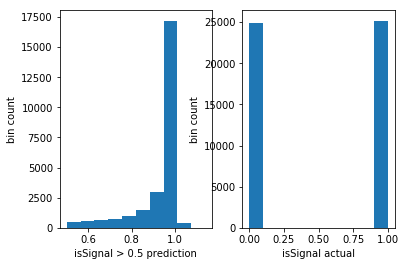

In [46]:
plt.subplot(121)
plt.hist(predictv2)
plt.xlabel('isSignal > 0.5 prediction')
plt.ylabel('bin count')
plt.subplot(122)
plt.hist(test_target)
plt.xlabel('isSignal actual')
plt.ylabel('bin count')
plt.show()

In [47]:
predictv2bins = predictv2[~np.isnan(predictv2)]
np.sum(predictv2bins), np.sum(test_target[test_target==1])

(23659.709349151486, 25167)

We can see above, taking a very rough estimate (using isSignal >= 0.5) that the prediction from the NN contains roughly the right amount of events, expecially for the small dataset it was trained on.

In [48]:
(np.sum(predictv2bins)/np.sum(test_target[test_target==1]))

0.9401084495232441

The NN predicts a signal correctly 0.94 of the time (94%) and only 'mis-assigns' a signal as background ~6% of the time.

For the next part, GradientBoostingRegressor has no method to calculate the probability of it's values, so I need to switch to another NN, so I set up the keras (tensorflow) NN we have used before. This one allows me to predict values and the probabilities of those values being right.

In [49]:
sc = preprocessing.StandardScaler ()
input_data = sc.fit_transform(NNinput)
# train -test  split  of  dataset
train_data3 , test_data3 , train_target3 , test_target3 = model_selection.train_test_split (\
input_data , NNoutput , test_size =0.5,  random_state=24)
print(train_data3.shape , train_target3.shape , test_data3.shape , test_target3.shape)

(50013, 9) (50013, 1) (50013, 9) (50013, 1)


In [50]:
num_inputs = len(newsubset)
num_nodes = 40
extra_depth = 2
N_epochs = 200
batchSize = 1500

model_new = my_util.my_model(num_inputs,num_nodes,extra_depth)

In [51]:
predicted = model_new.predict(mega2[newsubset])
predicted_signal = (predicted > 0.5)
wtype = ['background', 'signal']

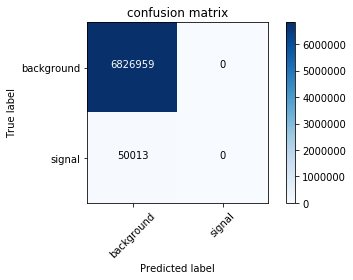

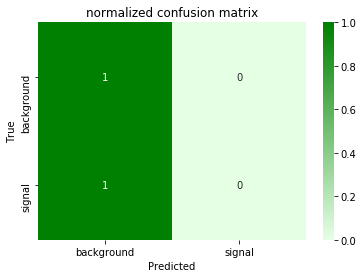

In [52]:
cm = sklearn.metrics.confusion_matrix(mega2['isSignal'], predicted_signal)
dt_utils.plot_cm(cm, wtype)
pl.title("confusion matrix")
pl.show()
nn_utils.heatmap(cm, labels=["Predicted", "True"], classes=[wtype,wtype], normalize=True)
pl.title("normalized confusion matrix")
pl.show()

Clearly, testing on the whole dataset, the small number of signal events (~100000 vs 6000000) means the model struggles to predict signals. Below I attempt to use the training and testing data sets I have set up previously to see if a 50/50 mix of signal and background makes it easier for the NN to predict signals.

In [53]:
predicted2 = model_new.predict(test_data3)
predicted_signal2 = (predicted2 > 0.5)

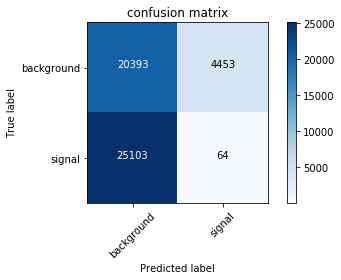

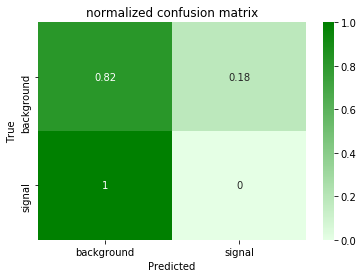

In [54]:
cm = sklearn.metrics.confusion_matrix(test_target3, predicted_signal2)
dt_utils.plot_cm(cm, wtype)
pl.title("confusion matrix")
pl.show()
nn_utils.heatmap(cm, labels=["Predicted", "True"], classes=[wtype,wtype], normalize=True)
pl.title("normalized confusion matrix")
pl.show()

This is a huge improvement from the previous dataset (predicted data using the entire dataset) however, the NN is still terrible at predicting signal events, even with a 50/50 mix, this may be due to the kinematics being so similar, I will attempt once more with the cut data sets to see if the model gets any better

In [98]:
predicted3 = model_new.predict(mega2[newsubset])
predicted_signal3 = (predicted3 > 0.5)

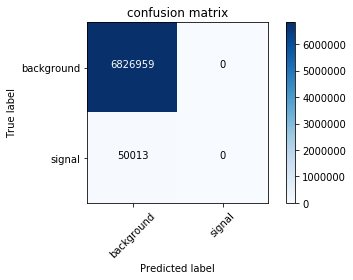

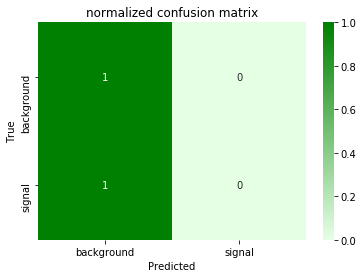

In [99]:
cm = sklearn.metrics.confusion_matrix(mega2['isSignal'], predicted_signal3)
dt_utils.plot_cm(cm, wtype)
pl.title("confusion matrix")
pl.show()
nn_utils.heatmap(cm, labels=["Predicted", "True"], classes=[wtype,wtype], normalize=True)
pl.title("normalized confusion matrix")
pl.show()

This is a confusing result as the model still predicts >99% of the events are background.

In [57]:
testdat = sc.fit_transform(mega2[newsubset])

In [58]:
predic_data=model_new.predict_proba(testdat)

Here, I am taking the predicted probability for the isSignal predicted and dropping values less than 0.5 and plotting the reco_zv_mass left.

In [101]:
probi=mega2[newsubset]
probi['probability'] = predic_data
probability = probi[probi['probability']>0.5]
probability = probability.query('800000<reco_zv_mass<1400000')

/opt/conda-pdaml/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


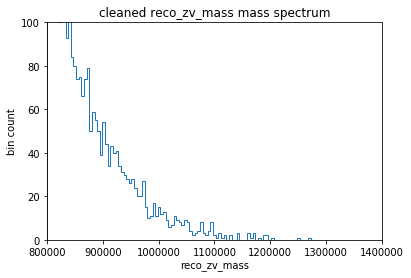

In [102]:
s=plt.hist(probability['reco_zv_mass'], bins=100, histtype='step')
plt.xlim(800000,1400000)
plt.ylim(0,100)
plt.title('cleaned reco_zv_mass mass spectrum')
plt.xlabel('reco_zv_mass')
plt.ylabel('bin count')
plt.show()

Zooming in on the area of interest, it is extremely hard to see if there is a signal there or not. I would definitely not have even seen the possible signal had I not known where to zoom in on the graph.

Fit converged =  False
Solution:  [2.90257181e+03 7.38163667e+01 6.62942900e+06 9.86858714e-06]
Fit converged =  True
Solution:  [2.90200160e+03 1.25112922e+02 6.62942900e+06 0.00000000e+00]
chi2_H1 =  12457052.070554432 chi2_H0 =  12457165.601571064 DChi2 =  113.53101663291454
p-value =  0.0  or a inf sigma effect
significance-value of : 0.0024155535453811603


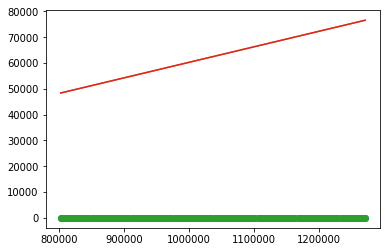

In [100]:
def Wilks():

    Nsig = len(ggH1000)
    Nbgd = len(Top+Zjets+Diboson)
    Ntot = Nsig + Nbgd
    f_sig = Nsig/(Nsig + Nbgd)
    
    H_data = s
    verbose = True
    chi2_H1 = a.Fitter(H_data, Ntot, f_sig, verbose)
    chi2_H0 = a.Fitter(H_data, Ntot, 0, verbose)
    Ndof = 1
    p_value = 1 - scipy.stats.chi2.cdf(chi2_H0 - chi2_H1, Ndof)
    n_sigmas = erfinv(1 - p_value) * np.sqrt(2)
    chi2_Wilks = chi2_H0 - chi2_H1
    print("chi2_H1 = ", chi2_H1, "chi2_H0 = ", chi2_H0, "DChi2 = ", chi2_Wilks)
    print("p-value = ", p_value, " or a {0:2.1f}".format(n_sigmas), "sigma effect")
    print("significance-value of : "+str(chi2_Wilks/sigma))
    
Wilks()

This time, Wilks rejects H1 and accepts the null hypothesis. Wilks theorem detects that the data is normal and cannot detect a signal in the distribution. This makes sense as the signal can't even be seen by eyes from the previous histogram. However, when I run it again, it gives a different answer, this time accepting the H1. Even though there appears to be no visible signal, it says there is a signal.

#  Impact of training sample on classifier

Now using the cut data (dataframes with kinematic cuts applied) to train and test a NN with again, a 50/50 split

In [62]:
#Feed data from interesting values to classifier
totaldataset = pd.concat([cutDiboson,cutTop,cutZjets],ignore_index=True)
totaldataset = totaldataset.query('800000<reco_zv_mass<1400000')
totaldataset = totaldataset[newsubset + output]
totaldataset.shape

(555715, 10)

In [63]:
signals = len(cutggH1000.index)
training = totaldataset.sample(n=signals)
background = len(training.index)
if (background == signals):
    print("continue")
    
finalNNdata = [cutggH1000,training]
finalNNdata = pd.concat(finalNNdata,ignore_index=True)
sklearn.utils.shuffle(finalNNdata, random_state=24)
finalNNdata.shape

continue


/opt/conda-pdaml/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(64580, 11)

In [64]:
newNNinput = finalNNdata[newsubset]
newNNoutput = finalNNdata[output]
newNNinput = newNNinput.values
newNNoutput = newNNoutput.values

In [65]:
kfold=KFold(n_splits=10,  random_state=24)
# train-test  split  of  dataset
train_data2 , test_data2 , train_target2 , test_target2 = model_selection.train_test_split (newNNinput , newNNoutput , test_size =0.5,  random_state=24)
print(train_data2.shape , train_target2.shape , test_data2.shape , test_target2.shape)

(32290, 9) (32290, 1) (32290, 9) (32290, 1)


In [66]:
train_r2v3 = gbr1.fit(train_data2 , train_target2.ravel())
print('R^2 of '+str(train_r2v3.score(train_data, train_target)))

R^2 of -0.7055604980991961


In [67]:
results3 = cross_val_score(gbr1, test_data2, test_target2.ravel() , cv=kfold, scoring='r2')
print("Result: %.2f %s %.2f" % (results3.mean(), u"\u00B1", results3.std() ))

Result: 0.63 ± 0.01


The R^2 values are lower and negative(? unsure why, it should not be negative, it suggests there are terms in the dataset that do not help the fit.) This shows that the kinematic cuts have made it more difficult for the model to predict a trend as I have altered it in a way that doesn't seem natural to the model. Or, I have imported and set up the training and testing datasets wrong, this seems more likely, but I can't see where I would have made a mistake with the dataset.

Either way, from the set up of the model (epochs, depth, nodes, sample sizes etc) to the data itself, every stage is prone to change. Some models will work better on cut data sets, and some models will work better with full datasets. The model I used appears to perform better on the full dataset than the cut/scaled datasets. Either too much information is cut during the kinematic cuts/ the trend is lost from the kinematic cuts, or the model struggles with the low level of signal.

# Conclusion

- **Setup**

The set up was the simplest part, the data was all fairly well scrubbed before we even used it (I found a few NaN values I had to drop). I replaced infinities with NaN, then dropped all NaN. The plots of the variables give good trends and a clear signal when normalised. Without normalising the datasets, the signal is drowned by the background. The cuts also made the trends very erratic, but the signal was visible after the cuts in the plots that weren't normalised. This was a good start to begin data processing.

- **Fitting and hypothesis-testing**

Fitting for the signal as a Gaussian was undoubtably more complicated. I found a strange error where the Fit() function I made would only properly converge on the data 1/4 times it was ran. However, when it did run, it fit the data extremely well.

Fitting the background was easier, I decided against using the overcomplicated method used for the gaussian. The background polynomial fit well in the area of interest (as that was what I specified), however, it was a terrible fit outside. I found fitting to the general trend gave a bad fit in the area of interest. Combining the two trends and using Wilks theorem found that the signal was there, with a low significance value. The p-value was 0 and gave an infinite sigma so it goes beyond discovery I suppose. But this is because I used the scaled, cut data so the dataset for background and signal were roughly the same, it would be quite different if I used the full dataset.

- **Employing a NN classifier**

I started with a GradientBoostingRegressor, which gave great results with R^2 values in the 80s when trained on the uncut, unscaled data set. This was the highest R^2 value I got, so I have to conclude that it was the best ML technique I used. However, small caveat, as I did not use the full data for the other models, perhaps they may have performed just as well. But I do like that it finds the best parameters instead of me trying to change epochs, depths, nodes etc... It predicted a signal correctly 94% of the time for a dataset of ~25000 entries.

Moving on the next ML technique, keras tensorflow was used as the GBR has no method to call to find the probabilities of it's predicted values. However, I feel my model was woefully inadequate as it was barely ever able to correctly predict a signal. The highest it ever predicted was ~5000 events (out of 100000) which was using data from the uncut, unscaled original dataset. It only got worse as I used cut data and scaled data. When using the predicted data and probability values of the predicted data. The signal disappeared and Wilks theorem gave a p-value of 1 and a negative significance value. Meaning that there was no way of misinterpreting the results, there was no signal present in the predicted data.

- **Impact of training sample on classifier**

Moving back to the GBR to test, using cut data made the R^2 value much lower for the test data and the train data R^2 was negative... I have to assume either there was variables in the data that don't contribute to the output (which there wasn't, I checked the dataframe) or that the cut data now had lost so much information on the trend that the ML algorithm struggled to find a pattern. Either way, I find that any ML technique, prefers the full, unedited dataset to make information decisions in its logic. By taking out information, it may make it easier for us to visualise, but makes it harder for the ML to process.